#Hearth Disease Prediction
Dataset from Kaggle : "Klasifikasi Penyakit Jantung"


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
file_path = 'heart.xls'
df = pd.read_csv(file_path)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Berikut ini adalah fitur yang akan saya gunakan untuk memprediksi variabel target (penyakit jantung atau tidak ada penyakit jantung).

    age - Usia dalam tahun
    sex - (1 = male; 0 = female)
    cp - chest pain type
        0: Typical angina: nyeri dada terkait mengurangi suplai darah ke jantung
        1: Atypical angina: nyeri dada tidak berhubungan dengan jantung
        2: Non-anginal pain: biasanya kejang esofagus (tidak berhubungan dengan jantung)
        3: Asymptomatic: nyeri dada tidak menunjukkan tanda-tanda penyakit
    trestbps - mengistirahatkan tekanan darah (dalam mm Hg saat masuk ke rumah sakit
        di atas 130-140 biasanya memprihatinkan
    chol - serum cholestoral dalam mg/dl
        serum = LDL + HDL + .2 * triglycerides
        di atas 200 yang memprihatinkan
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
    restecg - resting electrocardiographic results
        0: Tidak ada yang perlu diperhatikan
        1: ST-T Wave abnormality
            dapat berkisar dari gejala ringan hingga masalah parah
            sinyal detak jantung yang tidak normal
        2: Possible or definite left ventricular hypertrophy
            Ruang pompa utama jantung yang diperbesar
    thalach - denyut jantung maksimum tercapai
    exang - latihan diinduksi angina (1 = yes; 0 = no)
    oldpeak - Depresi ST yang disebabkan oleh olahraga relatif terhadap istirahat
        melihat stres jantung saat berolahraga
        jantung yang tidak sehat akan lebih stres
    slope - kemiringan segmen ST latihan puncak
        0: Upsloping: detak jantung yang lebih baik dengan olahraga (tidak biasa)
        1: Flatsloping: perubahan minimal (jantung sehat yang khas)
        2: Downslopins: tanda-tanda jantung yang tidak sehat
    ca - jumlah pembuluh darah utama (0-3) diwarnai oleh flourosopy
        pembuluh berwarna berarti dokter dapat melihat darah yang melewatinya
        semakin banyak gerakan darah semakin baik (tidak ada gumpalan)
    thal - hasil stres thalium
        1,3: normal
        6: fixed defect: dulu cacat tapi sekarang baik-baik saja
        7: reversable defect: tidak ada gerakan darah yang tepat saat berolahraga
    target - memiliki penyakit atau tidak (1=yes, 0=no) (= atribut yang diprediksi)


In [80]:
total_data = len(df)
print(f"Total data (jumlah baris): {total_data}")

Total data (jumlah baris): 303


In [81]:
# Memeriksa jumlah nilai NaN dalam setiap kolom
print("\nJumlah nilai NaN dalam setiap kolom:")
print(df.isna().sum())

# Menghapus baris yang berisi nilai NaN
data_cleaned = df.dropna()



Jumlah nilai NaN dalam setiap kolom:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [82]:
# Menampilkan beberapa baris pertama dari dataset setelah perubahan
print("\nSetelah menghapus nilai NaN:")
print(df.head())


Setelah menghapus nilai NaN:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


#Explorasi Data

In [83]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [84]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [85]:
#Keterangan : sex - (1 = male; 0 = female)
df["target"].value_counts().sort_values(ascending=True)

target
0    138
1    165
Name: count, dtype: int64

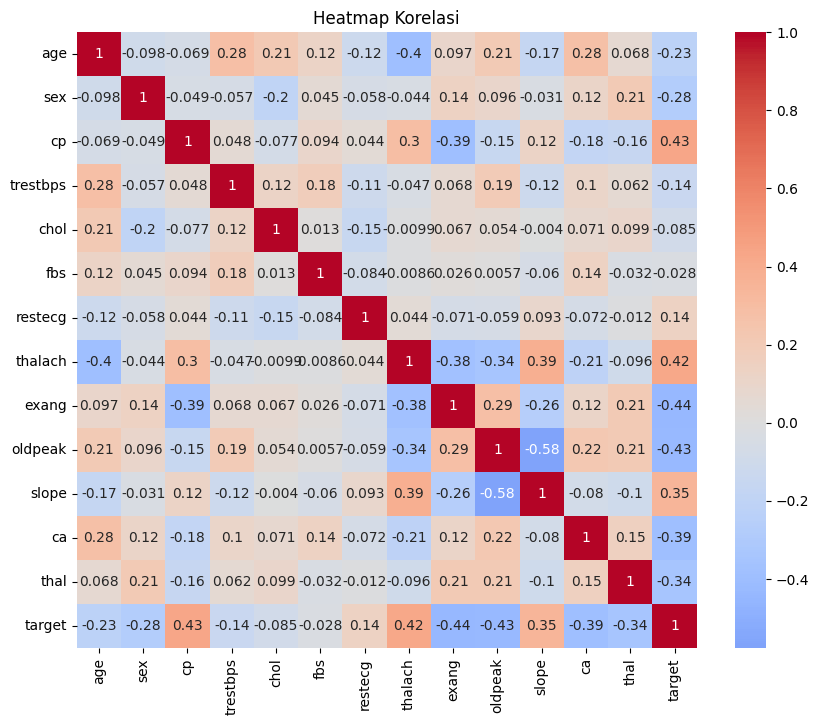

In [86]:
# Memilih kolom yang ingin dianalisis
columns_of_interest = ['age', 'sex', 'cp','trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','target']
data_cleaned = df[columns_of_interest]

# Menghitung matriks korelasi
correlation_matrix = data_cleaned.corr()

# Heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi')
plt.show()

#Modeling

In [87]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Create target object and call it y
y = df.target

# Create X (setiap fitur dipilih setelah melihat korelasi antar fitur dengan column target)
features = ['slope', 'thalach', 'restecg', 'cp', 'age', 'sex',]
X =df[features]

# split data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Logistic Regression

In [88]:
# Standarisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Melatih Model Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Membuat prediksi
y_pred = log_reg.predict(X_test)

# Evaluasi Model
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Untuk melihat koefisien dari model
print("Model coefficients: ", log_reg.coef_)
print("Model intercept: ", log_reg.intercept_)

Logistic Regression Accuracy:  0.819672131147541
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61

Model coefficients:  [[ 0.65666139  0.5401105   0.13430613  0.88780487 -0.35137861 -0.88772941]]
Model intercept:  [0.29982083]


In [89]:
# Prediksi harga rumah pada data fitur 'X'
predicted_home_prices = log_reg.predict(X)

# Gabungkan nilai sebenarnya dan prediksi ke dalam DataFrame untuk tampilan
results = pd.DataFrame({'Actual': y, 'Predicted': predicted_home_prices})

# Jika Anda ingin memformat kolom 'Predicted' tanpa desimal, Anda bisa menggunakan .apply
results['Actual'] = results['Actual'].apply(lambda x: "{:,.0f}".format(x))

# Jika Anda ingin memformat kolom 'Predicted' tanpa desimal, Anda bisa menggunakan .apply
results['Predicted'] = results['Predicted'].apply(lambda x: "{:,.0f}".format(x))

# Tampilkan beberapa baris hasil prediksi untuk dilihat
print(results.head(10))

  Actual Predicted
0      1         1
1      1         1
2      1         1
3      1         1
4      1         1
5      1         1
6      1         1
7      1         1
8      1         1
9      1         1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
